Student's Name `Luke Kivumbi`

### The Problem
An online school would like to understand its students better and predict which ones will pass the course and which will fail. You have been provided with information about the students and their performance in the course to
1. Cluster students into groups and describe those groups, and
2. Create a predictive model that will predict which students will fail the course.


In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#loading the data
df = pd.read_csv('Option_B_clustering - Option_B_clustering.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   gender                12737 non-null  int64
 1   highest_education     12737 non-null  int64
 2   imd_band              12737 non-null  int64
 3   age_band              12737 non-null  int64
 4   num_of_prev_attempts  12737 non-null  int64
 5   studied_credits       12737 non-null  int64
 6   disability            12737 non-null  int64
 7   passed_course         12737 non-null  int64
 8   assess_score_1        12737 non-null  int64
 9   assess_score_2        12737 non-null  int64
 10  assess_score_3        12737 non-null  int64
 11  assess_score_4        12737 non-null  int64
 12  assess_score_5        12737 non-null  int64
dtypes: int64(13)
memory usage: 1.3 MB


gender  highest_education  imd_band  age_band  num_of_prev_attempts  \
0       1                  2         9         2                     0   
1       0                  2         2         1                     0   
2       0                  3         5         1                     0   
3       0                  1         5         0                     0   
4       1                  2         3         0                     0   

   studied_credits  disability  passed_course  assess_score_1  assess_score_2  \
0              240           0              1              78              85   
1               60           0              1              70              68   
2               60           0              1              72              71   
3               60           0              1              69              30   
4               60           0              1              70              65   

   assess_score_3  assess_score_4  assess_score_5  
0              80              85              82  
1              70              64              60  
2              74              88              75  
3              63              35              75  
4              62              75              68

## Exploration

In [3]:
#missing values
df.isna().sum().sum()

0

No missing values

In [4]:
#duplicates
df.duplicated(keep='first').sum()

7

- Even though its possible for students to have the same scores, 7 seems to be on the higher side. lets first look at them

In [5]:
#looking at the duplicates
df[df.duplicated(keep=False)]

gender  highest_education  imd_band  age_band  num_of_prev_attempts  \
324         0                  2         6         0                     0   
1682        0                  2         6         0                     0   
2238        0                  3         8         0                     0   
2519        0                  3         8         0                     0   
11202       1                  3         4         0                     0   
11262       0                  1         8         1                     0   
11371       1                  3         4         0                     0   
11402       0                  1         7         0                     0   
11427       0                  1         7         0                     0   
11662       0                  1         7         1                     0   
11785       0                  1         7         1                     0   
12093       0                  1         0         0                     0   
12243       0                  1         8         1                     0   
12316       0                  1         0         0                     0   

       studied_credits  disability  passed_course  assess_score_1  \
324                120           0              1              87   
1682               120           0              1              87   
2238                60           0              1              80   
2519                60           0              1              80   
11202               30           0              1              75   
11262               30           0              1              80   
11371               30           0              1              75   
11402               30           0              1              80   
11427               30           0              1              80   
11662               30           0              1              75   
11785               30           0              1              75   
12093               30           0              1              60   
12243               30           0              1              80   
12316               30           0              1              60   

       assess_score_2  assess_score_3  assess_score_4  assess_score_5  
324                81              80              85             100  
1682               81              80              85             100  
2238               75             100              83              80  
2519               75             100              83              80  
11202              75              75             100             100  
11262              85              65             100             100  
11371              75              75             100             100  
11402              75              85             100             100  
11427              75              85             100             100  
11662              85              80             100             100  
11785              85              80             100             100  
12093              70              75             100             100  
12243              85              65             100             100  
12316              70              75             100             100

Since these are few, we shall drop them

In [6]:
#dropping duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

No more duplicates.

In [7]:
#looking at the description 
df.describe()

gender  highest_education      imd_band      age_band  \
count  12730.000000       12730.000000  12730.000000  12730.000000   
mean       0.446819           2.090102      4.407070      0.339199   
std        0.497183           0.940932      2.806379      0.488965   
min        0.000000           0.000000      0.000000      0.000000   
25%        0.000000           1.000000      2.000000      0.000000   
50%        0.000000           2.000000      4.000000      0.000000   
75%        1.000000           3.000000      7.000000      1.000000   
max        1.000000           4.000000      9.000000      2.000000   

       num_of_prev_attempts  studied_credits    disability  passed_course  \
count          12730.000000     12730.000000  12730.000000   12730.000000   
mean               0.107463        74.773763      0.091909       0.763001   
std                0.389890        37.459380      0.288909       0.425259   
min                0.000000        30.000000      0.000000       0.000000   
25%                0.000000        60.000000      0.000000       1.000000   
50%                0.000000        60.000000      0.000000       1.000000   
75%                0.000000        90.000000      0.000000       1.000000   
max                6.000000       630.000000      1.000000       1.000000   

       assess_score_1  assess_score_2  assess_score_3  assess_score_4  \
count    12730.000000    12730.000000    12730.000000    12730.000000   
mean        73.987274       74.915240       79.734328       75.661822   
std         19.166495       14.654117       17.653542       17.967908   
min          0.000000        0.000000        0.000000        0.000000   
25%         66.000000       66.000000       69.000000       65.000000   
50%         77.000000       76.000000       81.000000       79.000000   
75%         86.000000       86.000000       95.000000       89.000000   
max        100.000000      100.000000      100.000000      100.000000   

       assess_score_5  
count    12730.000000  
mean        78.106127  
std         19.529946  
min          0.000000  
25%         67.000000  
50%         80.000000  
75%         96.000000  
max        100.000000

- studied_credits and number of pervious attemps seem to have some outliers that may need to be checked out

In [8]:
#checcking value counts for number of previous attempts
df['num_of_prev_attempts'].value_counts()

0    11634
1      886
2      165
3       33
4        8
5        3
6        1
Name: num_of_prev_attempts, dtype: int64

Since no limit has been offered on the number of times one can attempt it doesn't seem impossible.

In [9]:
#lets now look at the values of studied_credits above the 75% mark of 90
df[df['studied_credits'] > 240]

gender  highest_education  imd_band  age_band  num_of_prev_attempts  \
381         0                  1         4         1                     0   
399         0                  3         1         0                     2   
519         0                  2         2         0                     1   
793         0                  3         3         1                     1   
1364        0                  1         1         1                     3   
1566        0                  1         5         1                     1   
2887        1                  1         0         1                     0   
3539        0                  3         0         1                     0   
3582        0                  1         1         0                     0   
3860        0                  0         5         1                     0   
5124        0                  3         9         1                     0   
5207        1                  3         9         0                     0   
5455        0                  1         4         0                     0   
6339        0                  3         4         0                     1   
6440        0                  3         4         0                     2   
7491        0                  2         1         1                     0   
7536        0                  3         0         0                     0   
7975        0                  3         4         0                     0   
8276        1                  2         7         1                     2   
8307        1                  3         6         0                     0   
8389        1                  1         2         0                     0   
8461        0                  3         8         0                     1   
8510        1                  2         3         0                     1   
8535        1                  1         1         0                     1   
8540        1                  3         1         0                     1   
9031        1                  3         9         0                     0   
9282        1                  3         8         0                     0   
9731        1                  3         4         0                     0   
9881        0                  3         0         0                     0   
10284       1                  3         4         0                     0   

       studied_credits  disability  passed_course  assess_score_1  \
381                325           0              1              73   
399                300           0              1              65   
519                270           0              1              67   
793                270           0              1              60   
1364               300           0              0              41   
1566               330           1              1              87   
2887               270           0              1              59   
3539               300           1              0              57   
3582               250           0              1              76   
3860               300           0              1             100   
5124               630           1              1             100   
5207               270           0              1              78   
5455               300           1              0              85   
6339               280           0              1              83   
6440               250           0              1              83   
7491               270           0              0              68   
7536               270           0              1              60   
7975               300           0              0              80   
8276               270           0              0              74   
8307               270           0              1              86   
8389               270           0              0              80   
8461               360           0              0              60   
8

Not enough information is given about how this score is achieved but i will still replace anything above 300 with 300 as this seems a reasonable maximum.

In [10]:
#replcacing studied_credits above 300 with 300
df['studied_credits'] = df['studied_credits'].apply(lambda x: 300 if x > 300 else x)     #copilot with lenovo
df.describe()

gender  highest_education      imd_band      age_band  \
count  12730.000000       12730.000000  12730.000000  12730.000000   
mean       0.446819           2.090102      4.407070      0.339199   
std        0.497183           0.940932      2.806379      0.488965   
min        0.000000           0.000000      0.000000      0.000000   
25%        0.000000           1.000000      2.000000      0.000000   
50%        0.000000           2.000000      4.000000      0.000000   
75%        1.000000           3.000000      7.000000      1.000000   
max        1.000000           4.000000      9.000000      2.000000   

       num_of_prev_attempts  studied_credits    disability  passed_course  \
count          12730.000000     12730.000000  12730.000000   12730.000000   
mean               0.107463        74.728594      0.091909       0.763001   
std                0.389890        37.048205      0.288909       0.425259   
min                0.000000        30.000000      0.000000       0.000000   
25%                0.000000        60.000000      0.000000       1.000000   
50%                0.000000        60.000000      0.000000       1.000000   
75%                0.000000        90.000000      0.000000       1.000000   
max                6.000000       300.000000      1.000000       1.000000   

       assess_score_1  assess_score_2  assess_score_3  assess_score_4  \
count    12730.000000    12730.000000    12730.000000    12730.000000   
mean        73.987274       74.915240       79.734328       75.661822   
std         19.166495       14.654117       17.653542       17.967908   
min          0.000000        0.000000        0.000000        0.000000   
25%         66.000000       66.000000       69.000000       65.000000   
50%         77.000000       76.000000       81.000000       79.000000   
75%         86.000000       86.000000       95.000000       89.000000   
max        100.000000      100.000000      100.000000      100.000000   

       assess_score_5  
count    12730.000000  
mean        78.106127  
std         19.529946  
min          0.000000  
25%         67.000000  
50%         80.000000  
75%         96.000000  
max        100.000000

In [11]:
#scaling the data since its on different standards
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[ 1.11267471, -0.09576216,  1.63666813, ...,  0.01504979,
         0.51973465,  0.19938743],
       [-0.89873527, -0.09576216, -0.85774757, ..., -0.55143103,
        -0.64906168, -0.92713204],
       [-0.89873527,  0.96705591,  0.21128773, ..., -0.3248387 ,
         0.68670555, -0.15905058],
       ...,
       [-0.89873527, -1.15858024, -0.14505737, ..., -0.43813487,
         1.35458917,  0.09697657],
       [-0.89873527,  0.96705591, -0.85774757, ..., -0.55143103,
        -0.87168955, -0.92713204],
       [-0.89873527, -0.09576216,  0.21128773, ..., -1.11791185,
         1.35458917, -0.92713204]])

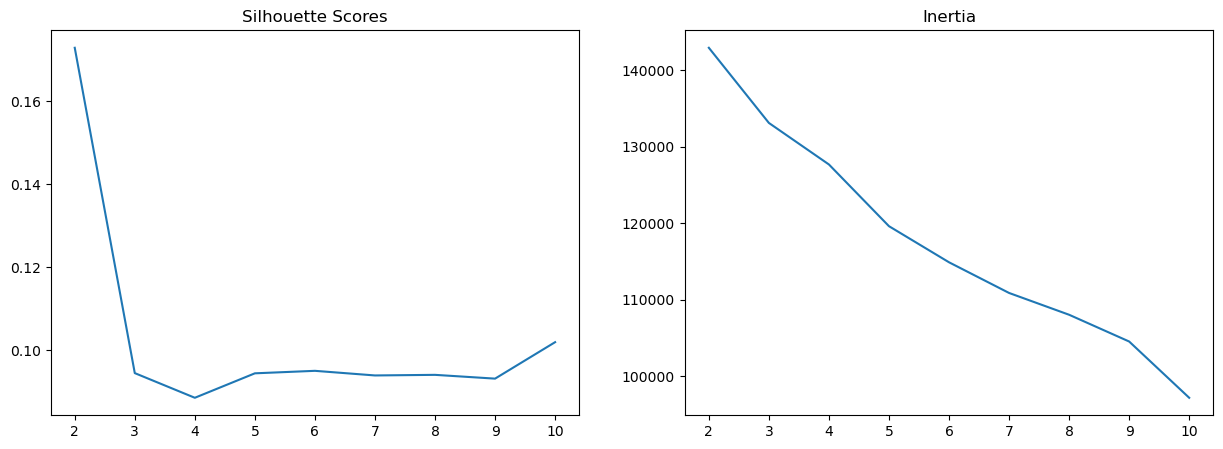

In [12]:
from sklearn.metrics import silhouette_score     #code from class notes on the lp
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
  kmeans.fit(df_scaled)
  sils.append(silhouette_score(df_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

- if we are to go by inertia, 3 clusters is optimal but according to silhouette score, 2 is optimal. since silhouette scores shows how well separated the clusters are, I will choose 2 clusters.

In [13]:
# Refit KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, n_init= 'auto', random_state=42)
kmeans.fit(df_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

gender  highest_education  imd_band  age_band  num_of_prev_attempts  \
0       1                  2         9         2                     0   
1       0                  2         2         1                     0   
2       0                  3         5         1                     0   
3       0                  1         5         0                     0   
4       1                  2         3         0                     0   

   studied_credits  disability  passed_course  assess_score_1  assess_score_2  \
0              240           0              1              78              85   
1               60           0              1              70              68   
2               60           0              1              72              71   
3               60           0              1              69              30   
4               60           0              1              70              65   

   assess_score_3  assess_score_4  assess_score_5  cluster  
0              80              85              82        1  
1              70              64              60        0  
2              74              88              75        1  
3              63              35              75        0  
4              62              75              68        0

## Understanding and visualising the clusters

In [14]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

cluster    gender  highest_education  imd_band  age_band  \
0        0  0.484713           1.960960  3.839370  0.271167   
1        1  0.427813           2.154871  4.691791  0.373319   

   num_of_prev_attempts  studied_credits  disability  passed_course  \
0              0.165099        81.195908    0.125353       0.474365   
1              0.078556        71.485020    0.075136       0.907761   

   assess_score_1  assess_score_2  assess_score_3  assess_score_4  \
0       62.747883       63.823848       66.119003       60.418627   
1       79.624204       80.477943       86.562869       83.306794   

   assess_score_5  
0       61.934149  
1       86.216914

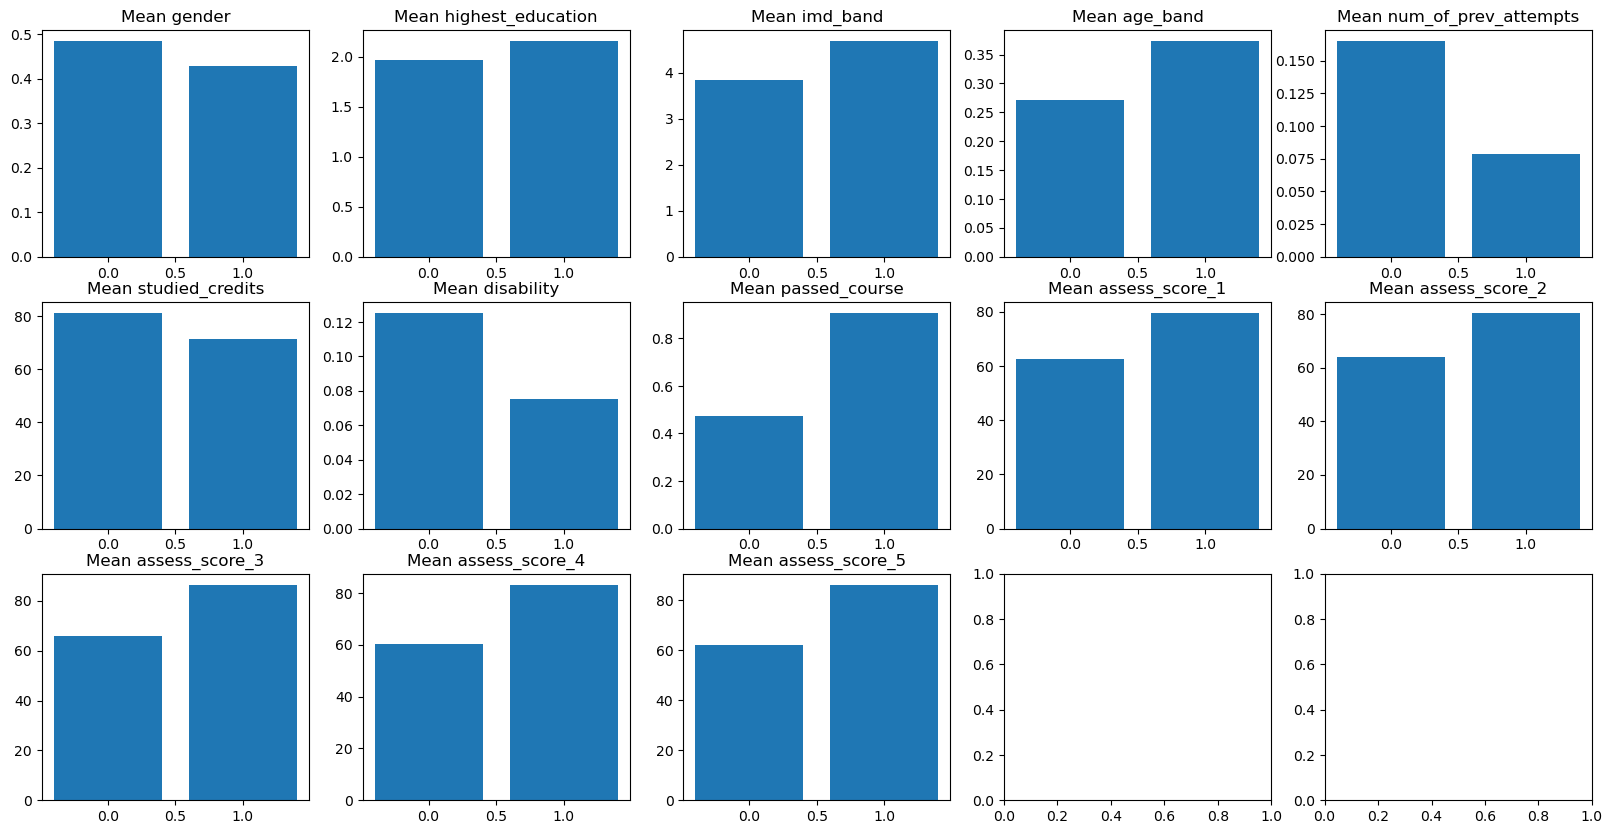

In [15]:
# Visualize means    #learing platform
fig, axes = plt.subplots(3,5, figsize = (20, 10))
# fig is an array of dimensions 3,5.  axes.ravel() will flatten it
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

### Cluster 1
- Cluster 1 seems to have individuals with a higher education level than those of cluster 0. 
- They are older and have attempted the course fewer times.  
- They are less diabled than those of cluster 0, have passed the course more on average than those of cluster 0 and have fairly higher assess scores than those of cluster o. These individuals fall in more of gender 0 than 1.
- these individuals seems to come from neighbourhoods that generally are not as deprived as those of cluster 0.

### Cluster 0
- This cluster has individuals on average who have attained a lower level of education than those of cluster 1, they have a higher average in studied credit and previous number of attempts.

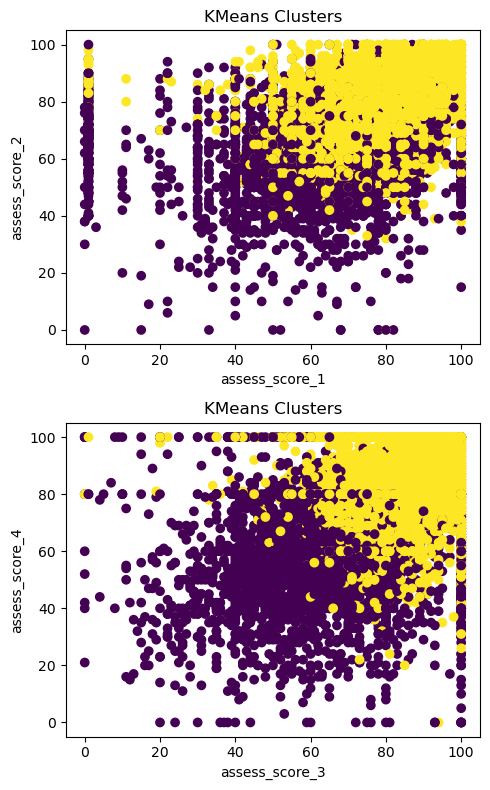

In [16]:
# Save the cluster labels to the dataframe
# Visualize the clusters
fig, axes = plt.subplots(2,1, figsize=(5,8))
axes[0].scatter(df['assess_score_1'], df['assess_score_2'], c = df['cluster'])
axes[0].set_xlabel('assess_score_1')
axes[0].set_ylabel('assess_score_2')
axes[0].set_title('KMeans Clusters')
axes[1].scatter(df['assess_score_3'], df['assess_score_4'], c = df['cluster'])
axes[1].set_xlabel('assess_score_3')
axes[1].set_ylabel('assess_score_4')
axes[1].set_title('KMeans Clusters');
plt.tight_layout();

- The above scatter plots attempt to show how the different clusters are split. It is clear that one cluster contains the higher scores from the assessment scores (cluster 1) while the other has the lower scores (cluster 0).
- It can be seen that there're some errant points in the clustering though.

## Part 2: Modeling Instructions
The online school has provided new data about the daily activities of each student on their learning platform, how early or late they completed each assessment, and which courses they were taking. However, this has caused the data table to have over 900 columns.

They would now like you to use this data to predict which students will pass the course and which will fail.

passed_course is your target variable

In [17]:
#further imports
#Keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout

#Sci-kit Learn
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_columns',100)

## CUSTOM FUNCTIONS

In [18]:
# Custom function for plotting each metric
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

In [19]:
#loading the data
df2 = pd.read_csv('Option_B_modeling.csv')
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Columns: 931 entries, gender to presentation_2014J
dtypes: int64(931)
memory usage: 90.5 MB


gender  highest_education  imd_band  age_band  num_of_prev_attempts  \
0       1                  2         9         2                     0   
1       0                  2         2         1                     0   
2       0                  3         5         1                     0   
3       0                  1         5         0                     0   
4       1                  2         3         0                     0   

   studied_credits  disability  passed_course  assess_score_1  assess_score_2  \
0              240           0              1              78              85   
1               60           0              1              70              68   
2               60           0              1              72              71   
3               60           0              1              69              30   
4               60           0              1              70              65   

   assess_score_3  assess_score_4  assess_score_5  assess_submitted_1  \
0              80              85              82                  -1   
1              70              64              60                   3   
2              74              88              75                  -2   
3              63              35              75                   7   
4              62              75              68                   1   

   assess_submitted_2  assess_submitted_3  assess_submitted_4  \
0                  -1                  -2                  -2   
1                  -2                   4                  -2   
2                  -3                  -2                  -1   
3                  21                   7                  15   
4                   0                   0                   0   

   assess_submitted_5  assess_submitted_6  assess_score_6  assess_submitted_7  \
0                  -3                   0               0                   0   
1                  -3                   0               0                   0   
2                  -2                   0               0                   0   
3                   7                   0               0                   0   
4                   1                   0               0                   0   

   assess_score_7  assess_submitted_8  assess_score_8  assess_submitted_9  \
0               0                   0               0                   0   
1               0                   0               0                   0   
2               0                   0               0                   0   
3               0                   0               0                   0   
4               0                   0               0                   0   

   assess_score_9  assess_submitted_10  assess_score_10  assess_submitted_11  \
0               0                    0                0                    0   
1               0                    0                0                    0   
2               0                    0                0                    0   
3               0                    0                0                    0   
4               0                    0                0                    0   

   assess_score_11  assess_submitted_12  assess_score_12  assess_submitted_13  \
0                0                    0                0                    0   
1                0                    0                0                    0   
2                0                    0                0                    0   
3                0                    0                0                    0   
4                0                    0                0                    0   

   assess_score_13  assess_submitted_14  assess_score_14  sum_activities_-25  \
0                0                    0                0                   0   
1                0                    0                0                   0   
2                0                    0                0                   0   
3  

- This is an numeric dataset

In [20]:
#checking for missing values
df2.isna().sum().sum()

0

No missing values to impute

In [21]:
#checking for duplicates
df2.duplicated().sum()

0

since data was cleaned lets move on to preprocessing

## Preprocessing

- we shall scale the data for PCA

In [22]:
#Defining X and y
X = df2.drop('passed_course', axis=1)
y = df2['passed_course']
#Train test validation split
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size = .3, random_state=42)
# Split the X_test_val into test and val data
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size = .5, random_state=42)

## Scale Data
We will transform all three data sets.

In [23]:
# Scale our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [24]:
#transforming the data with PCA to keep 95% of the variance.
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train)
X_train_pca.head()

pca0      pca1      pca2      pca3      pca4      pca5      pca6  \
4347 -5.332263  1.340222 -0.979051  1.686999 -0.860782  0.603881 -0.403907   
4308 -3.641795  1.792276 -0.022436 -1.031220 -2.084400  0.226042  0.131921   
6415 -5.979295 -1.331517  1.224323  0.279821  1.244259 -0.814669 -1.252270   
5635 -1.450396  0.309962  0.592228  0.810125 -0.477291  1.810884 -0.966211   
8077 -6.408928  0.494000  1.532808  0.188278 -0.731069  0.835840 -0.180396   

          pca7      pca8      pca9     pca10     pca11     pca12     pca13  \
4347  2.797680  0.450793  0.265892 -0.199406  0.990591  1.182014 -0.786100   
4308 -0.660507  0.856778  4.058965  0.890893  0.878576  3.227174 -2.755112   
6415  0.134636  0.839029  0.647278 -0.557529  1.503786 -1.521412  1.104328   
5635  6.221391 -1.204798 -0.048774 -3.023013  0.297051  1.181223  2.090417   
8077  1.003330 -0.234300  0.608621 -0.481357  0.315419  0.301500 -1.143289   

         pca14     pca15     pca16     pca17     pca18     pca19     pca20  \
4347 -1.495755 -3.884750  1.260941 -1.137930 -0.380855 -0.161435 -1.225186   
4308 -1.698394  1.931642  1.501640 -0.812080  2.892419 -2.521572 -3.482876   
6415  0.313730  1.389846 -0.111683 -0.423186 -0.263875 -0.120436  1.168120   
5635 -2.202051 -3.642733 -0.604751  1.021458 -0.662612 -0.277587 -0.829519   
8077  1.030901 -0.064149 -0.697195 -0.030034 -0.267594 -0.657034 -0.118108   

         pca21     pca22     pca23     pca24     pca25     pca26     pca27  \
4347 -2.087518 -1.656408  0.491537 -0.668161  0.842015 -1.293204 -1.139783   
4308 -2.732514 -2.243291  1.544908 -0.313566 -0.293383  0.834305  1.259238   
6415 -1.229498  0.225802  0.144138  0.360032  1.525146 -0.926937 -0.480502   
5635 -0.965414 -0.284999 -0.850997 -0.513164 -0.648751 -1.073048 -1.016906   
8077 -0.481164 -0.750997  0.932394  1.175517  0.245865  0.222549  0.640752   

         pca28     pca29     pca30     pca31     pca32     pca33     pca34  \
4347 -3.026752  1.088303 -0.784212  1.378851 -0.691543  0.202487 -1.346903   
4308  0.496586  0.363382  0.078712 -3.312151 -2.168679 -1.250612  2.401580   
6415  0.152131  0.280357  0.691119  0.686250 -0.880275 -0.210613  0.471757   
5635  1.692206 -0.512527  0.255189 -0.743767  0.663746 -1.471270 -1.159619   
8077 -0.565680  0.147540  0.275528 -0.112003 -0.057649  1.374883 -0.207964   

         pca35     pca36     pca37     pca38     pca39     pca40     pca41  \
4347  2.433165  0.895635  0.932198 -0.801829 -0.887907  0.644344  0.917685   
4308 -0.854484 -0.652982 -1.365450 -0.744667  0.753327  4.335031  1.284590   
6415 -0.031526  0.964593  0.164643  0.134005 -0.366295  0.797717 -0.564527   
5635 -0.151543 -1.460525  2.275492  1.410892  0.008751  0.312904  1.166385   
8077 -0.060422  0.341701  0.467233  0.555366 -0.399417  0.526991 -0.172800   

         pca42     pca43     pca44     pca45     pca46     pca47     pca48  \
4347  0.545580  1.227831 -2.106304  0.063573  0.660746 -4.740155 -1.513390   
4308 -0.781675 -1.185650 -0.172729  1.129747 -0.167465 -1.076279  2.461029   
6415 -0.554724 -0.345813  0.455008  0.070009 -0.741720 -0.442422  0.265926   
5635  0.379376 -0.363057 -0.208787 -0.035318  0.410813 -2.073995 -1.153443   
8077 -0.107414 -0.200697 -0.000997 -0.732422 -0.648732 -0.156496 -0.232457   

         pca49  ...    pca435    pca436    pca437    pca438    pca439  \
4347 -0.293878  ...  0.464567 -0.995137  0.620363  1.486408  0.727271   
4308  0.078935  ...  0.562240 -0.140376  0.075737 -0.096843 -0.093277   
6415  0.462451  ... -0.016732  0.254919  0.013312  0.376186 -0.348007   
5635 -0.361421  ... -0.223286  0.043572  0.150437 -0.570335 -0.042785   
8077 -0.097801  ... -0.107134  0.145606  0.300915 -0.228818 -0.115878   

        pca440    pca441    pca442    pca443    pca444    pca445    pca446  \
4347  0.116302  0.775732 -0.223534 -0.522036  0.386581  0.161935  0.331898   
4308  0.149417 -0.215424 -0.151779 -0.397116 -0.505728  0.174771  0.249766   
6415 -0.409987  0.205931  0.300492  0.141034  0.072849

From 931, our features have been trimmed down to 485 features

In [25]:
#transforming other data
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

# Fitting a deep learning model
- we shall start with a default sequential model with sigmoid with one hidden layer
- then we shall reduce on the neurons in the first layer plus dropout
- the third model will have early stopping as a form of regularisation


## Default model

In [26]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train_pca.shape[1]
input_shape

485


Now we will define the model, compile it, and show the summary.

In [27]:
# Without early stopping
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(20, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model.add(Dense(10,
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam',
              metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision'),
                        ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                9720      
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,941
Trainable params: 9,941
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Fit the model and keep the history and use 100 epochs
history = model.fit(X_train_pca, y_train,
                    validation_data= (X_val_pca, y_val),
                    epochs=100)

Epoch 1/100
279/279 [==============================] - 3s 6ms/step - loss: 0.4945 - accuracy: 0.7794 - recall: 0.9048 - precision: 0.8236 - val_loss: 0.4102 - val_accuracy: 0.8430 - val_recall: 0.9302 - val_precision: 0.8729
Epoch 2/100
279/279 [==============================] - 1s 4ms/step - loss: 0.3217 - accuracy: 0.8707 - recall: 0.9498 - precision: 0.8886 - val_loss: 0.3820 - val_accuracy: 0.8629 - val_recall: 0.9378 - val_precision: 0.8891
Epoch 3/100
279/279 [==============================] - 1s 4ms/step - loss: 0.2721 - accuracy: 0.8920 - recall: 0.9600 - precision: 0.9044 - val_loss: 0.3774 - val_accuracy: 0.8645 - val_recall: 0.9350 - val_precision: 0.8929
Epoch 4/100
279/279 [==============================] - 1s 3ms/step - loss: 0.2397 - accuracy: 0.9038 - recall: 0.9656 - precision: 0.9133 - val_loss: 0.3850 - val_accuracy: 0.8634 - val_recall: 0.9343 - val_precision: 0.8922
Epoch 5/100
279/279 [==============================] - 1s 4ms/step - loss: 0.2155 - accuracy: 0.9165

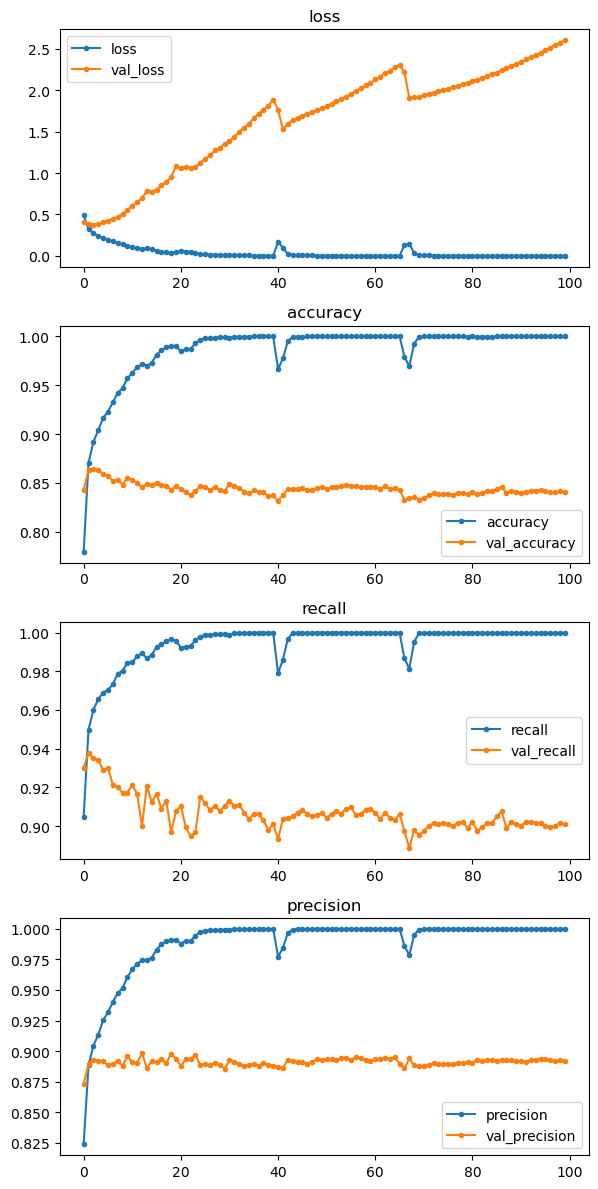

In [29]:
#plotting the history
plot_history(history, marker='.');

In [30]:
# Evaluate neural network with built in evaluation
result = model.evaluate(X_test_pca, y_test, return_dict=True)
result

60/60 [==============================] - 0s 3ms/step - loss: 2.6634 - accuracy: 0.8336 - recall: 0.8938 - precision: 0.8877


{'loss': 2.6634302139282227,
 'accuracy': 0.8335949778556824,
 'recall': 0.8937931060791016,
 'precision': 0.8876712322235107}

The validation loss is increasing and yet this should be reducing for the validation data. this is a clear sign that our model isnt performing well on unseen data.
- this model shows signs of being overfit as it performs extremely well on the training data

In [32]:
# make predictions
y_pred_test = model.predict(X_test_pca)
y_pred_test[:5]

60/60 [==============================] - 0s 2ms/step


array([[0.00753979],
       [0.0124704 ],
       [1.        ],
       [1.        ],
       [1.        ]], dtype=float32)

In [33]:
# round the predictions for sci kit learn classification report
y_pred_test = np.round(y_pred_test)
y_pred_test[:5]

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.]], dtype=float32)

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       461
           1       0.89      0.89      0.89      1450

    accuracy                           0.83      1911
   macro avg       0.77      0.77      0.77      1911
weighted avg       0.83      0.83      0.83      1911



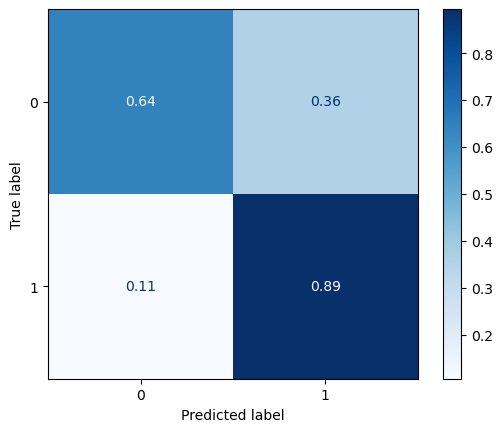

In [34]:
#Now that our predictions are formatted, we can call our sklearn metrics.
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Blues',
                                       normalize='true');

## Including dropout layer

### Model2

In [35]:
# Sequential model
model2 = Sequential()
# First hidden layer
model2.add(Dense(20, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model2.add(Dense(10,
                activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation = 'sigmoid'))
model2.compile(loss = 'bce', optimizer = 'adam',
             metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision')])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                9720      
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,941
Trainable params: 9,941
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Fit the model and keep the history and use 100 epochs
history2 = model2.fit(X_train_pca, y_train,
                    validation_data= (X_val_pca, y_val),
                    epochs=100)

Epoch 1/100
279/279 [==============================] - 3s 6ms/step - loss: 0.5576 - accuracy: 0.7552 - recall: 0.9769 - precision: 0.7666 - val_loss: 0.4570 - val_accuracy: 0.7776 - val_recall: 0.9979 - val_precision: 0.7757
Epoch 2/100
279/279 [==============================] - 1s 4ms/step - loss: 0.4466 - accuracy: 0.7893 - recall: 0.9790 - precision: 0.7935 - val_loss: 0.4070 - val_accuracy: 0.8472 - val_recall: 0.9706 - val_precision: 0.8507
Epoch 3/100
279/279 [==============================] - 1s 4ms/step - loss: 0.3871 - accuracy: 0.8132 - recall: 0.9705 - precision: 0.8186 - val_loss: 0.3820 - val_accuracy: 0.8577 - val_recall: 0.9466 - val_precision: 0.8771
Epoch 4/100
279/279 [==============================] - 1s 4ms/step - loss: 0.3509 - accuracy: 0.8184 - recall: 0.9734 - precision: 0.8217 - val_loss: 0.3851 - val_accuracy: 0.8619 - val_recall: 0.9514 - val_precision: 0.8782
Epoch 5/100
279/279 [==============================] - 1s 4ms/step - loss: 0.3351 - accuracy: 0.8201

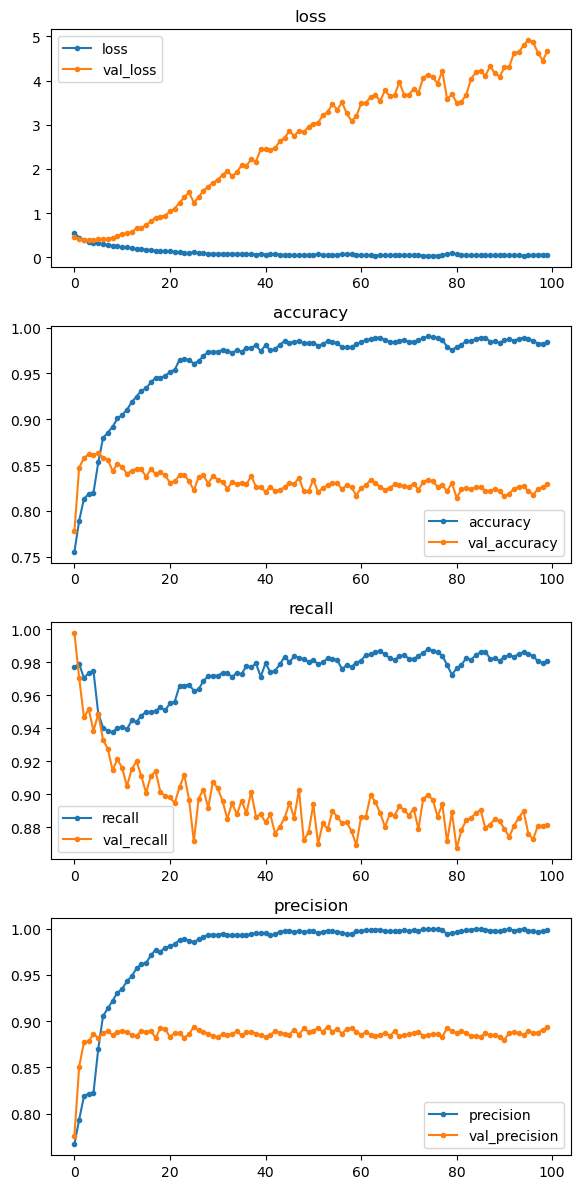

In [37]:
#plotting the history
plot_history(history2, marker='.');

In [38]:
# Evaluate neural network with built in evaluation
result = model2.evaluate(X_test_pca, y_test, return_dict=True)
result

60/60 [==============================] - 0s 3ms/step - loss: 4.7620 - accuracy: 0.8237 - recall: 0.8759 - precision: 0.8900


{'loss': 4.76200532913208,
 'accuracy': 0.8236525654792786,
 'recall': 0.8758620619773865,
 'precision': 0.8899790048599243}

In [39]:
# make predictions
y_pred_test = model2.predict(X_test_pca)
y_pred_test[:5]

60/60 [==============================] - 0s 3ms/step


array([[1.        ],
       [0.99992347],
       [1.        ],
       [1.        ],
       [1.        ]], dtype=float32)

In [40]:
# round the predictions for sci kit learn classification report
y_pred_test = np.round(y_pred_test)
y_pred_test[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

              precision    recall  f1-score   support

           0       0.63      0.66      0.64       461
           1       0.89      0.88      0.88      1450

    accuracy                           0.82      1911
   macro avg       0.76      0.77      0.76      1911
weighted avg       0.83      0.82      0.83      1911



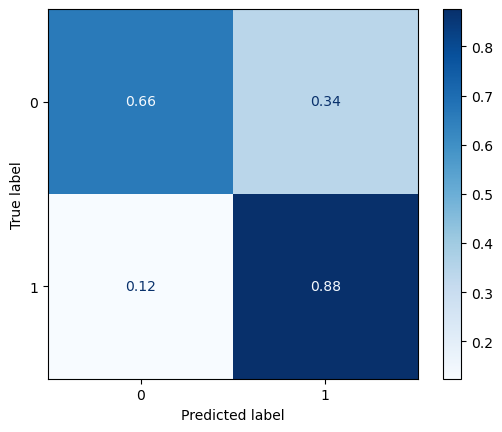

In [41]:
#Now that our predictions are formatted, we can call our sklearn metrics.
print(classification_report(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Blues',
                                       normalize='true');

- this model still shows signs of over fitting and the validation loss is still increasing. we will need early stoping to probably curb this. 
- This model doesn't perform better than model 1 although overall performance is at 83%. its precision for predicting passing is slightly lower.

## Early stoping

In [42]:
# Sequential model
model3 = Sequential()
# First hidden layer
model3.add(Dense(20, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model3.add(Dense(10,
                activation = 'relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation = 'sigmoid'))
model3.compile(loss = 'bce', optimizer = 'adam',
             metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision')])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                9720      
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,941
Trainable params: 9,941
Non-trainable params: 0
_________________________________________________________________


In [43]:
from tensorflow.keras.callbacks import EarlyStopping
# Instantiate EarlyStopping
early_stopping = EarlyStopping(patience = 5)

In [44]:
# Fit the model and keep the history and use 100 epochs
history3 = model3.fit(X_train_pca, y_train,
                    validation_data= (X_val_pca, y_val),
                    epochs=100, callbacks = [early_stopping])

Epoch 1/100
279/279 [==============================] - 4s 6ms/step - loss: 0.5844 - accuracy: 0.7107 - recall: 0.8613 - precision: 0.7820 - val_loss: 0.4434 - val_accuracy: 0.8226 - val_recall: 0.9774 - val_precision: 0.8236
Epoch 2/100
279/279 [==============================] - 1s 4ms/step - loss: 0.4382 - accuracy: 0.8166 - recall: 0.9449 - precision: 0.8362 - val_loss: 0.3785 - val_accuracy: 0.8598 - val_recall: 0.9501 - val_precision: 0.8769
Epoch 3/100
279/279 [==============================] - 1s 4ms/step - loss: 0.3674 - accuracy: 0.8575 - recall: 0.9508 - precision: 0.8738 - val_loss: 0.3566 - val_accuracy: 0.8592 - val_recall: 0.9439 - val_precision: 0.8807
Epoch 4/100
279/279 [==============================] - 1s 4ms/step - loss: 0.3349 - accuracy: 0.8698 - recall: 0.9526 - precision: 0.8856 - val_loss: 0.3507 - val_accuracy: 0.8697 - val_recall: 0.9549 - val_precision: 0.8841
Epoch 5/100
279/279 [==============================] - 1s 4ms/step - loss: 0.3136 - accuracy: 0.8756

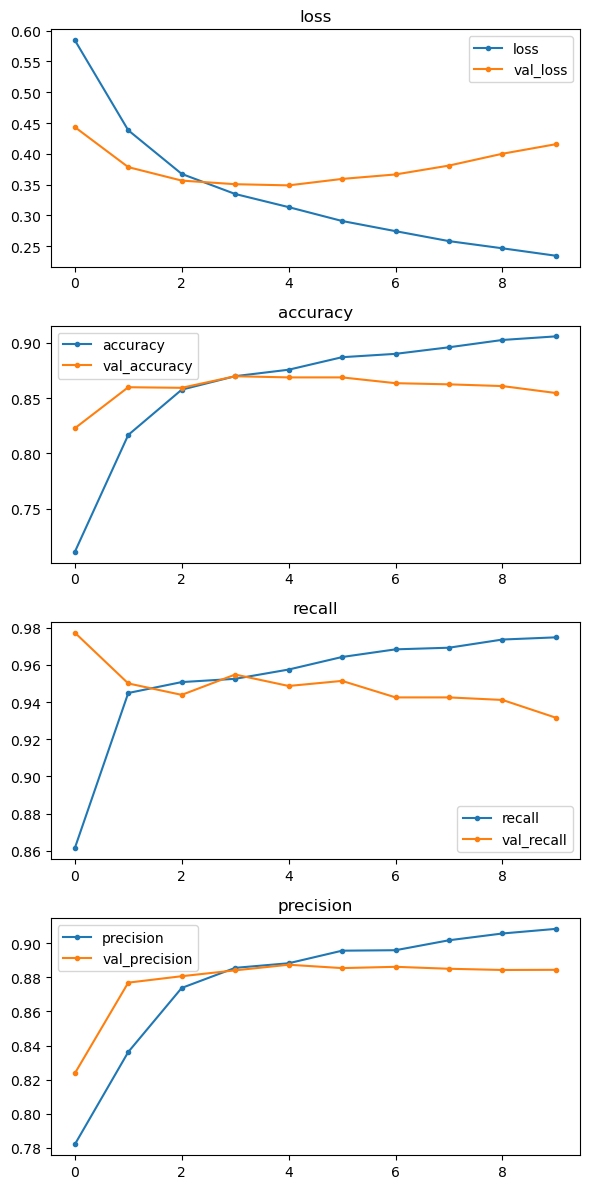

In [45]:
#plotting the history
plot_history(history3, marker='.');

This model was clearly stopped early as continuing would have led to over fitting

In [46]:
# Evaluate neural network with built in evaluation
result = model3.evaluate(X_test_pca, y_test, return_dict=True)
result

60/60 [==============================] - 0s 3ms/step - loss: 0.4403 - accuracy: 0.8624 - recall: 0.9366 - precision: 0.8882


{'loss': 0.4402841329574585,
 'accuracy': 0.8623757362365723,
 'recall': 0.9365517497062683,
 'precision': 0.8881621956825256}

In [47]:
# make predictions
y_pred_test = model3.predict(X_test_pca)
y_pred_test[:5]

60/60 [==============================] - 0s 3ms/step


array([[0.8553833 ],
       [0.91587234],
       [0.8186949 ],
       [0.97877973],
       [0.9993473 ]], dtype=float32)

In [48]:
# round the predictions for sci kit learn classification report
y_pred_test = np.round(y_pred_test)
y_pred_test[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

              precision    recall  f1-score   support

           0       0.76      0.63      0.69       461
           1       0.89      0.94      0.91      1450

    accuracy                           0.86      1911
   macro avg       0.82      0.78      0.80      1911
weighted avg       0.86      0.86      0.86      1911



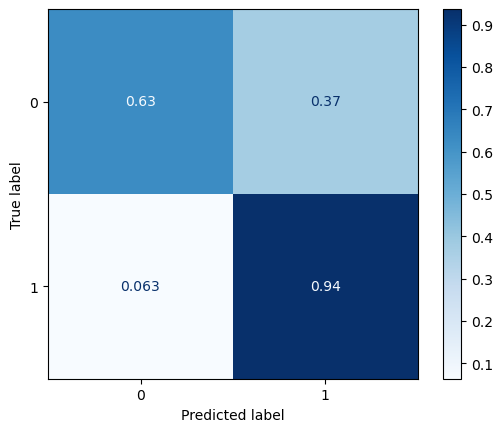

In [49]:
#Now that our predictions are formatted, we can call our sklearn metrics.
print(classification_report(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Blues',
                                       normalize='true');

- this model is better than the other two model with a performance of 86%. this model has a higher accuracy in predicting students who will pass with about 94% accuracy although its power for predicting failer is almost similar to that of model 2 at 63%.
- Further, this is a better model because it took the shortest time to train compared to the first two as it was stopped when validation loss started to increase.
- This is therefore the best performing model and would be my choice